<h3>PART V: ML: Supervised: Classification: K-Nearest Neighbors </h3>
<h4>Name: <u> Srinivas Rao Kolla </u></h4>
<br>
<h5> Machine Learning: K Nearest Neighbours </h5>

The K-nearest neighbors algorithm is among the simplest of all machine learning algorithms.

An object is classified by a majority vote of its neighbors with the object being assigned to the class most common among its K nearest neighbors.

K is a positive integer, typically small: k = 3,5, or 10.

KNN can do multiple(more than two) class prediction.

In binary(two-class) classification problems. It is helpful to choose k to be an odd number as this can avoid a tie vote

Import python Libraries and Modules

In [1]:
#Import python Libraries: Numpy and Pandas
import pandas as pd
import numpy as np

In [2]:
#Import Libraries and Modules for data visualization
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

In [3]:
#Import scikit-Learn module for the algorithm/model: Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

In [4]:
#Import scikit-Learn module to split the dataset into train/test sub-datasets
from sklearn.model_selection import train_test_split

In [5]:
#Import scikit-Learn module for K-fold cross-validation - algorithm/model evaluation and validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [6]:
#Import scikit-Learn module classification report to later use for information about how thesystem try to classify/lable each record.
from sklearn.metrics import classification_report

<u><h3>LOAD THE DATASET</h3></u>

Title: 
       <blockquote> pima diabetes database</blockquote>

Source: 

<blockquote>This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.</blockquote>

Predicted atribute: 
                       <blockquote>class</blockquote>

Number of Predictors:
                       <blockquote>8 numeric,predictive attributes and a class.</blockquote>

Attribute Information:

<blockquote>preg - Pregnancies (Number of times pregnant)

pclass - Glucose (Plasma glucose concentration a 2 hours in an oral glucose tolerance test)

pres - BloodPressure (Diastolic blood pressure (mm Hg))

skin - SkinThickness (Triceps skin fold thickness (mm))

test - Insulin (2-Hour serum insulin (mu U/ml))

mass - BMI (Body mass index (weight in kg/(height in m)^2))

pedi - DiabetesPedigreeFunction (Diabetes pedigree function)

age - Age (Age (years))

class - Outcome (Class variable (0 or 1) 268 of 768 are 1, the others are 0)</blockquote>

In [7]:
filename = '/Users/prithvinagkolla/Desktop/Data Sets/pima_diabetes.csv'
df = pd.read_csv(filename)
#Load the data into a pandas dataframe
df = pd.read_csv(filename)

<h3>Pre-process Dataset</h3>
<br>
<h5>Clean Data: Find and Mark Missing Values</h5>
<br>
NOTES:
<br>
The following columns cannot contain 0(zero) values i.e 0(zero) values are invalid in these columns.If they exist we need to mark them as missing value with the mean values of their column.
<br>
<h5> Preprocess the Dataset: Clean Data: Find and Mark Missing Values

In [8]:
#Fill null values with mean of the column
df = df.fillna(df.mean())
#Print the null values present in each column
print(df.isnull().sum())

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64


<h3>Perform the exploratory data analysis(EDA) on the dataset</h3>
<br>
#The code below plot histogram for each numeric variable/attribute of the dataset, density plots, boxplot, and scatter plot matrix

In [9]:
#get the dimensions or shape of the dataset
#i.e. number of records/rows x number of variables / columns

print(df.shape)

(768, 9)


In [10]:
#get the data types of all the variables / attributes in the data set
print(df.dtypes)

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object


In [11]:
#return the first five records/rows of the datset
print(df.head(5))

   preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1


In [12]:
#return the summary statistics of the numeric variables/ attributes in the data set
print(df.describe())

             preg        plas        pres        skin        test        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

In [13]:
#class distribution i.e. how many records are in each class
print(df.groupby('class').size())

class
0    500
1    268
dtype: int64


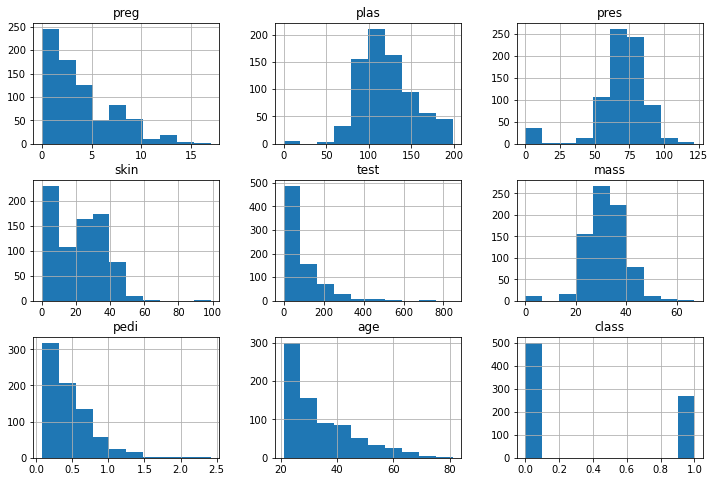

In [14]:
#plot histogram of each numeric variable/attribute in the data set
df.hist(figsize = (12,8))
pyplot.show()

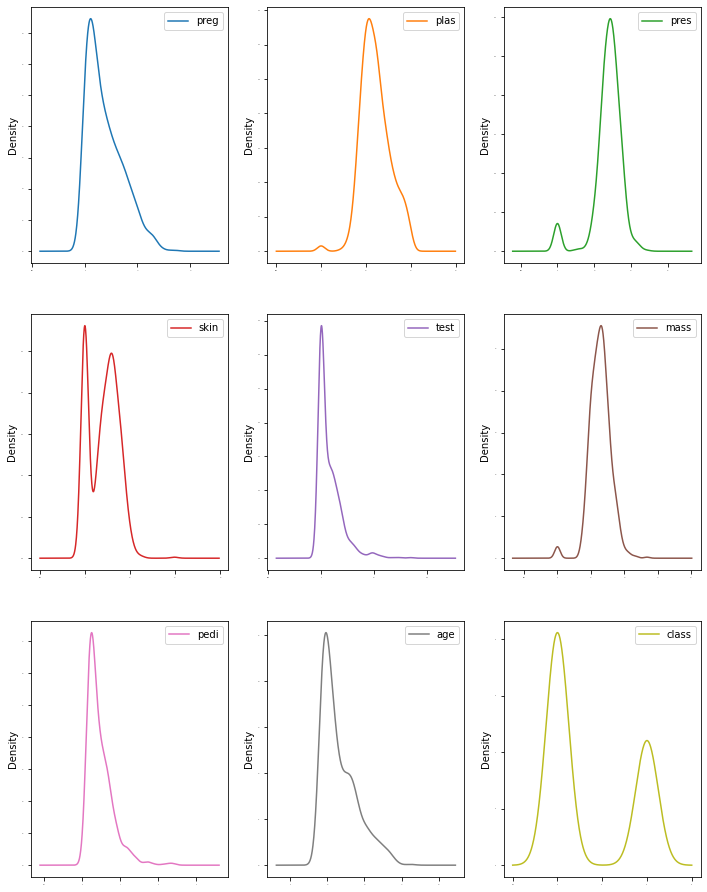

In [15]:
#generate density plots of each numeric variable/attribute in the data set
df.plot(kind = 'density',subplots = True, layout = (3,3), sharex = False, legend = True, fontsize = 1,figsize = (12,16))
pyplot.show()

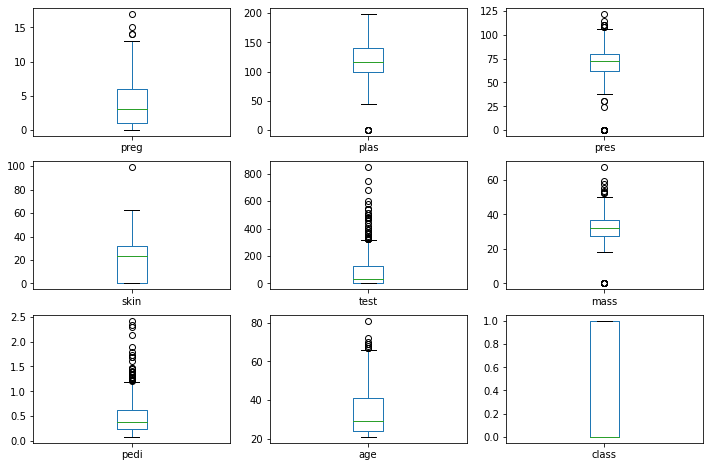

In [16]:
#generate box plots of each numeric variable / attribute in the data set
df.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, figsize = (12,8))
pyplot.show()

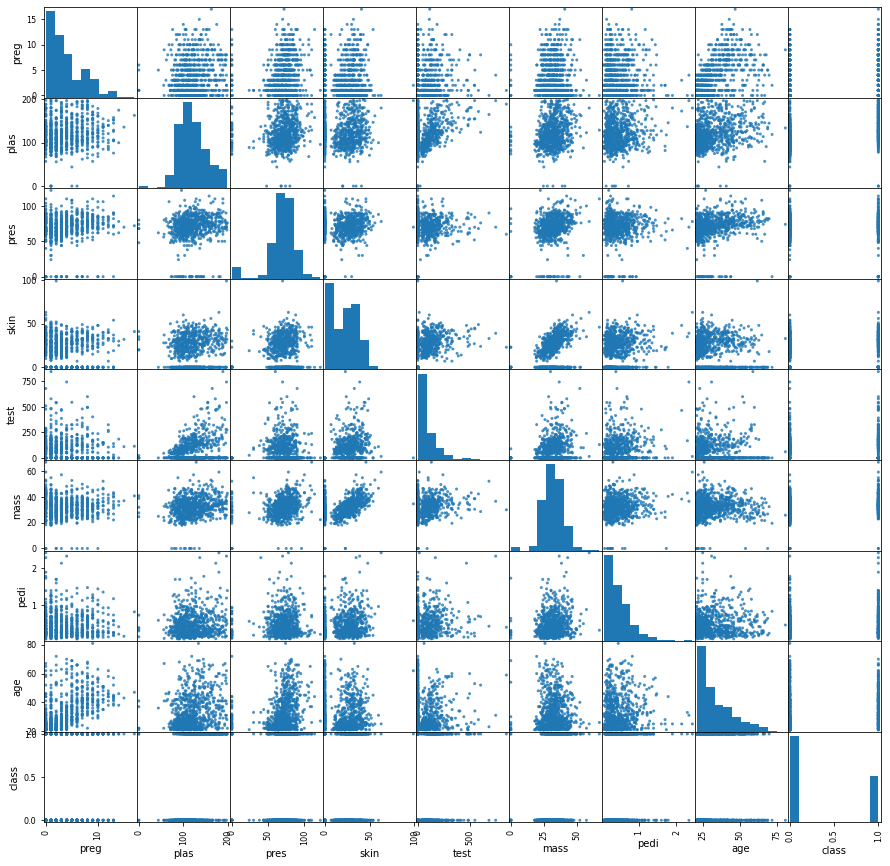

In [17]:
#generate scatter plot matrix of each numeric variable/ attribute in the data set
scatter_matrix(df,alpha = 0.8, figsize = (15,15))
pyplot.show()

<h3>Separate Dataset into Input and Output Numpy arrays</h3><br>
Why do we separate the whole data into 2 arrays(we will later split the data into train and score)?<br>
- Training data Set (X) consist of the independent variables or predictors<br>
- Desired Output(Y) consist of the dependent variable or that which we are trying to predict

In [18]:
#store dataframe values into a numpy array.
array = df.values
# seperate data set into input and output by slicing
# for X(input) [:,1:9] all the rows from 1 to 9
# these are independent variables or predictors
X = array[:,0:8]
#for Y(input) [: ,9], all the rows in column 9
# these are the values we are trying to predict.
Y = array[:,8]

<h3>Split Input/Output Arrays into Training/Testing Datasets</h3>

In [19]:
#split the dataset -> training sub-dataset: 67%, test sub-dataset: 33%
test_size = 0.33
#selection of records to include in each data sub-dataset must be done randomly
seed = 7
#split the dataset(input and output) into training/test datasets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=test_size,random_state = seed)

<h3>Build and Train the Model</h3>
<br>
#The code below build the Model, Train the model using the training sub dataset, Print out the coefficients and the intercept, Print intercept and coefficients, if we want to print out the list of coefficients with their correspondent variable name, pair the feature names with the coefficients and convert iterator in to set

In [20]:
#build the model
model = KNeighborsClassifier()
#train the the model using the training sub-dataset
model.fit(X_train,Y_train)
#print the classification report
predicted = model.predict(X_test)
report = classification_report(Y_test,predicted)
print(report)

              precision    recall  f1-score   support

         0.0       0.74      0.80      0.77       162
         1.0       0.59      0.51      0.55        92

    accuracy                           0.69       254
   macro avg       0.66      0.65      0.66       254
weighted avg       0.69      0.69      0.69       254



Notes: classification report - precision, recall, F1-score and support
<br>
The precision is the ratio tp/(tp+fp)
<br>
-> where tp is the number of true positives and fp the number of false positives
<br>
The precision represents the ability of the classifier not to label a positive sampleas negative
<br>
<br>
The recall is the ratio tp/(tp+fn)
<br>
-> Where tp is the number of true positives and fn the number of false negatives
<br>
The recall represents the ability of the classifier to find all the positive samples
<br>
<br>
The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall
<br>
-> where an F-beta score reaches its best value at 1 and worst score at 0.
<br>
The F-beta score weights recall more than precision by a factor of beta.
<br>
beta == 1.0 means recall and precision are equally important.
<br>
The support is the number of occurences of each class in y_true.
<br>
<br>
<h3>Score the accuracy of the model</h3>

In [22]:
#score the accuracy level
result = model.score(X_test,Y_test)
#print out the results
print(("Accuracy: %.3f%%")%(result*100.0))

Accuracy: 69.291%


<h3> Prediction </h3>

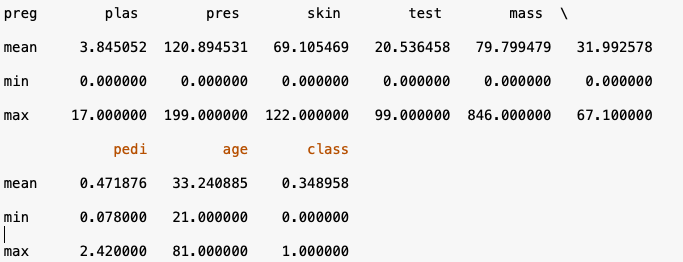

In [23]:
#Import packages to display images from user.
from IPython.display import Image
#Importing image from user
Image(filename='/Users/prithvinagkolla/Desktop/mean1.png')

The above image shows the mean, max, min values in each variable,this will help in creating new data set variables for prediction

In [24]:
print(model.predict([[4,130,71,30,100,40,1,25]]))
print(model.predict([[5,140,80,45,250,45,2,30]]))

[0.]
[1.]


Notes: 
So, the model predicts in the above new patient records, one patient has no diabetis and other having diabetis.
<br>
<h3>Evaluate/Validate Algorithm/Model - using K-Fold Cross-Validation</h3>
<br><br>
<p>#specify the number of times of repeated splitting, Fix the random seed, you must use the same seed value so that the same subset can be obtained for each time the process is repeated, Splitting the whole data set into folds, for logistic regression, we can use accuracy level to evaluate the model/algorithm, train the model and run k-fold cross-validation to validate the model, Print out the evaluation results.</p>

In [25]:
#evaluate the algorithm
#specify the number of time of repeated splitting, in this case 10 folds
n_splits = 10
#fix the random seed
#must use the same seed value so that the same sub sets can be obtained
#for each time the process is repeated.
seed = 7
#split the whole data set into folds.
"""In K-fold cross validation, the original sample is randomly partitioned into k equal sized sub samples.Of the k 
subsamples a single sub sample is retained as the validation data for the testing of the model, and the remaining 
k-1 sub samples are used as training data, the cross validation is then repeated k times,with each of the k sub 
samples used exactly once as validation data, the k results can then be averaged to produce a single estimation. The
advantage of this method over repeated random sub-sampling is that all observations are used for both training and
validation, and each observation is used for validation exactly once."""
kfold = KFold(n_splits, random_state = seed,shuffle=True)
#for KNN Classifier, we use accuracy level to evaluate model/algorithm
scoring = 'accuracy'
#train the model and run the K fold cross validation to evaluate the model
results = cross_val_score(model, X,Y, cv = kfold, scoring = scoring)
#print the evaluation results
#result: the average of all the results obtained from the K fold cross validation
print('Accuracy: %.3f (%.3f)'% (results.mean(), results.std()))

Accuracy: 0.711 (0.051)


#using the 10-fold cross-validation to evaluate the model/algorithm, the accuracy of this logistic regression model is 71.1%
<br>
<br>
<h5> NOTES</h5>
Above, the model predict that one of the patient doesn't have diabetis and one has diabetis.
<br> Based on the model's accuracy score obtained from the model evaluation using 10-fold cross-validation, There is 71.1% chance that one of the patient doesn't have diabetis and other has diabetis.